# Visualize the Extracted Features

In [22]:
import sys
sys.path.append('../')

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path

%matplotlib inline
pd.set_option('display.float_format', '{:.2f}'.format)
cmap = sns.color_palette("coolwarm", desat=0.8)

In [23]:
RESULTS_DIR = Path('results')

In [24]:
egfx_files = []

for file in os.listdir(RESULTS_DIR):
    if file.endswith('.json') and file.startswith('egfxset'):
        egfx_files.append(file)

egfx_df = {}  # Dictionary to store dataframes

for file in egfx_files:
    # Full path to the file
    file_path = RESULTS_DIR / file
    
    # Read the content of the file into a DataFrame using lines=True
    df = pd.read_json(file_path, lines=True)
    
    # Store the DataFrame in the dictionary
    # Use the file name (without extension) as the key
    key = file.split('.')[0]  # This removes the '.json' extension
    egfx_df[key] = df

# Now you can access each DataFrame using the filename (without extension) as the key
egfx_df['egfxset_y_valid'].head()

,idx,gain,leq,loudness,zcr,pitch,confidence,flatness,hfc
0,0,[-10.1799488068],[-23.2057380676],[1.7719078064],[0.0648312867],[379.7515869141],[0.8141684532],[0.1199551746],[12.2932577133]
1,1,[-13.3986682892],[-19.6088657379],[2.7260346413],[0.0277759302],[368.3184814453],[0.9578561783],[0.1317824125],[13.4961957932]
2,2,[-13.2164878845],[-18.9056968689],[3.7360792160000003],[0.0197327957],[276.6007080078],[0.9811679721000001],[0.1766796708],[14.9570560455]
3,3,[-9.306646347000001],[-27.2726402283],[0.9804779887],[0.0481611528],[393.9040222168],[0.9711587429],[0.1523497701],[9.901804924]
4,4,[-11.2705936432],[-18.588848114],[4.0659794807],[0.0170378983],[216.3127593994],[0.9628298879],[0.1707576513],[9.7224693298]


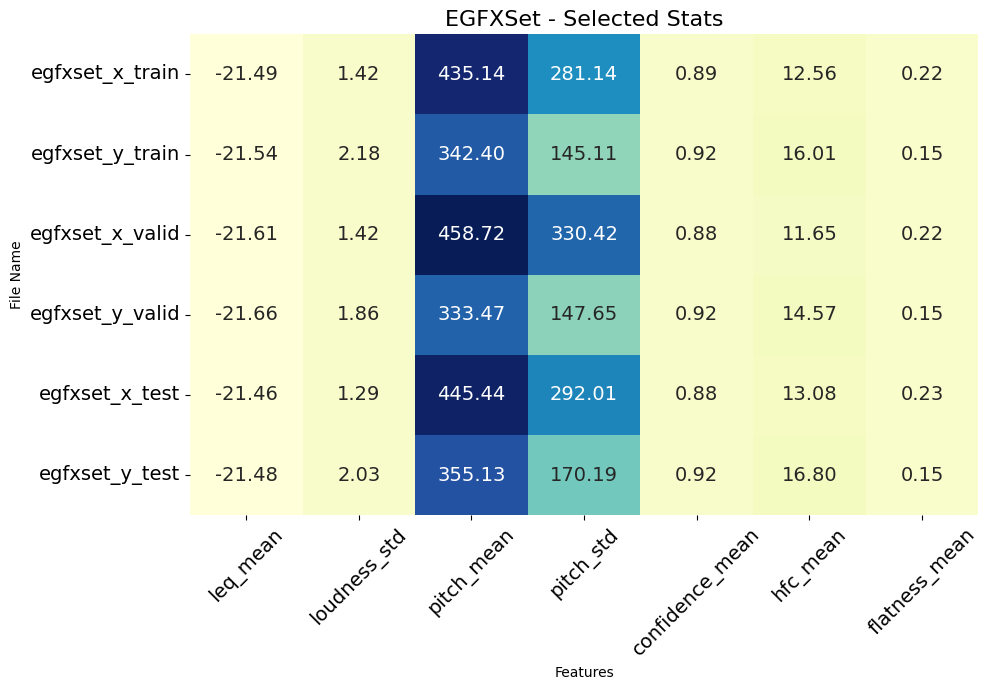

In [25]:
egfx_stats = []

for key, df in egfx_df.items():
    # Convert single-value lists into their values
    for col in df.columns:
        if df[col].apply(lambda x: isinstance(x, list)).any():
            df[col] = df[col].str[0]
    
    # Create a dictionary to store computed stats for this key
    stats_dict = {}
    stats_dict['leq_mean'] = df['leq'].mean()
    stats_dict['loudness_std'] = df['loudness'].std()
    stats_dict['pitch_mean'] = df['pitch'].mean()
    stats_dict['pitch_std'] = df['pitch'].std()
    stats_dict['confidence_mean'] = df['confidence'].mean()
    stats_dict['hfc_mean'] = df['hfc'].mean()
    stats_dict['flatness_mean'] = df['flatness'].mean()
    
    # Convert to Series and name it for future concatenation
    stats_series = pd.Series(stats_dict, name=key)
    egfx_stats.append(stats_series)

# Concatenate all the series into a DataFrame
egfx_stats_df = pd.concat(egfx_stats, axis=1).T

# Specify the desired order for rows
order = [
    'egfxset_x_train',
    'egfxset_y_train',
    'egfxset_x_valid',
    'egfxset_y_valid',
    'egfxset_x_test',
    'egfxset_y_test'
]

# Reorder the rows of egfx_features_df
egfx_stats_df = egfx_stats_df.reindex(order)


plt.figure(figsize=(10, 7))
sns.heatmap(egfx_stats_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False,  annot_kws={"size": 14})  # Use YlGnBu colormap or choose any other
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.yticks(rotation=0)  # Rotate y-axis labels by 0 degrees
plt.title("EGFXSet - Selected Stats", fontsize=16)
plt.ylabel("File Name")
plt.xlabel("Features")
plt.tight_layout()
plt.savefig('plots/egfxset-heatmap.png')
plt.show()

In [26]:
spring_files = []

for file in os.listdir(RESULTS_DIR):
    if file.endswith('.json') and file.startswith('springset'):
        spring_files.append(file)

spring_df = {}  # Dictionary to store dataframes

for file in spring_files:
    # Full path to the file
    file_path = RESULTS_DIR / file
    
    # Read the content of the file into a DataFrame using lines=True
    df = pd.read_json(file_path, lines=True)
    
    # Store the DataFrame in the dictionary
    # Use the file name (without extension) as the key
    key = file.split('.')[0]  # This removes the '.json' extension
    spring_df[key] = df

# Now you can access each DataFrame using the filename (without extension) as the key
spring_df['springset_y_valid'].head()

,idx,gain,leq,loudness,zcr,pitch,confidence,flatness,hfc
0,0,[-12.4690074921],[-12.4248504639],[12.191239357],[0.0264587402],[107.8781051636],[0.9183375835],[0.2999181151],[28.030878067]
1,1,[-15.4313526154],[-13.0762872696],[10.7856388092],[0.0714416504],[214.5379943848],[0.9004535079],[0.2355791479],[82.9615249634]
2,2,[-10.2138080597],[-7.8743238449],[25.6529865265],[0.0129699707],[93.1524353027],[0.8980537653],[0.3245175481],[50.1607131958]
3,3,[-16.346206665],[-11.2013034821],[14.9429836273],[0.030166626000000002],[122.2587356567],[0.9021036625000001],[0.3036969304],[53.1505775452]
4,4,[-16.7153053284],[-13.4056892395],[10.4023065567],[0.1166229248],[406.8092651367],[0.819004178],[0.22823061050000001],[82.8912506104]


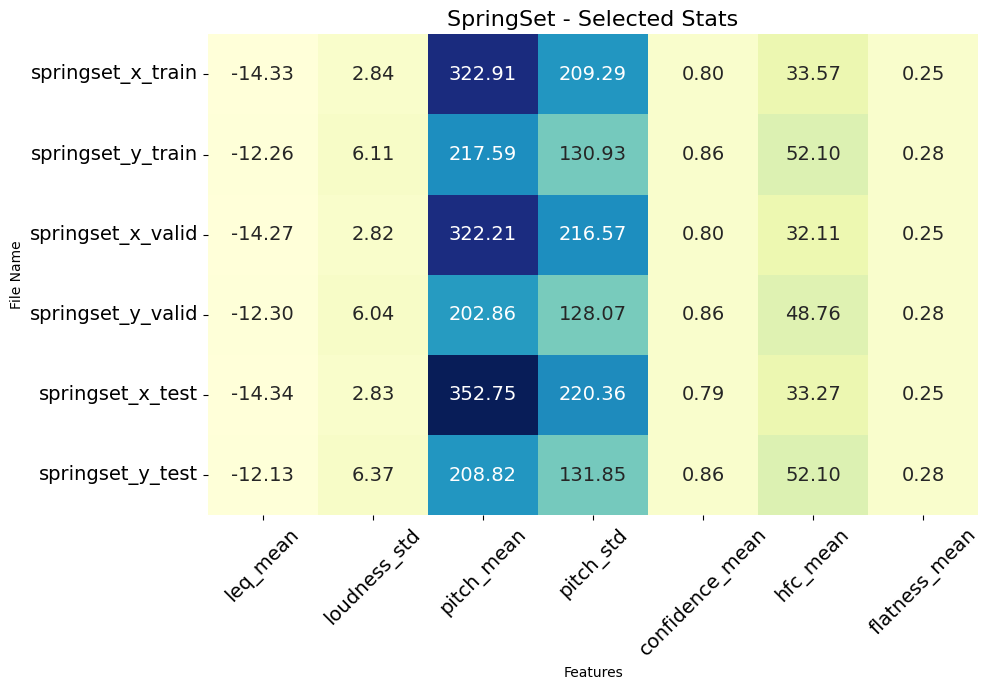

In [27]:
spring_stats = []

for key, df in spring_df.items():
    # Convert single-value lists into their values
    for col in df.columns:
        if df[col].apply(lambda x: isinstance(x, list)).any():
            df[col] = df[col].str[0]
    
    # Create a dictionary to store computed stats for this key
    stats_dict = {}
    stats_dict['leq_mean'] = df['leq'].mean()
    stats_dict['loudness_std'] = df['loudness'].std()
    stats_dict['pitch_mean'] = df['pitch'].mean()
    stats_dict['pitch_std'] = df['pitch'].std()
    stats_dict['confidence_mean'] = df['confidence'].mean()
    stats_dict['hfc_mean'] = df['hfc'].mean()
    stats_dict['flatness_mean'] = df['flatness'].mean()
    
    # Convert to Series and name it for future concatenation
    stats_series = pd.Series(stats_dict, name=key)
    spring_stats.append(stats_series)

# Concatenate all the series into a DataFrame
spring_stats_df = pd.concat(spring_stats, axis=1).T

# Specify the desired order for rows
order = [
    'springset_x_train',
    'springset_y_train',
    'springset_x_valid',
    'springset_y_valid',
    'springset_x_test',
    'springset_y_test'
]

# Reorder the rows of egfx_features_df
spring_stats_df = spring_stats_df.reindex(order)


plt.figure(figsize=(10, 7))
sns.heatmap(spring_stats_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False, annot_kws={"size": 14})
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.yticks(rotation=0)  # Rotate y-axis labels by 0 degrees
plt.title("SpringSet - Selected Stats", fontsize=16)
plt.ylabel("File Name")
plt.xlabel("Features")
plt.tight_layout()
plt.savefig('plots/springset-heatmap.png')
plt.show()

In [28]:
# Step 1: Reading the Data
egfxset_df = pd.read_csv(RESULTS_DIR / 'egfxset_dc_snr.csv')

# Compute and Print Statistics
for label in ['dry_DC', 'wet_DC', 'SNR']:
    print(f"---- {label} ----")
    print(f"Mean: {egfxset_df[label].mean()}")
    print(f"Standard Deviation: {egfxset_df[label].std()}")
    print(f"Minimum: {egfxset_df[label].min()}")
    print(f"Maximum: {egfxset_df[label].max()}")
    print()

---- dry_DC ----
Mean: 8.121613180857361e-06
Standard Deviation: 1.475729593991348e-05
Minimum: -9.870452049653976e-05
Maximum: 7.89308687672019e-05

---- wet_DC ----
Mean: -1.3978346246427502e-07
Standard Deviation: 3.2708674881413424e-06
Minimum: -4.737782364827581e-05
Maximum: 4.12461522500962e-05

---- SNR ----
Mean: 0.5960802102893374
Standard Deviation: 2.604849263275402
Minimum: -6.733835220336914
Maximum: 8.67159652709961



In [29]:
# Step 1: Reading the Data
springset_df = pd.read_csv(RESULTS_DIR / 'springset_dc_snr.csv')

# Compute and Print Statistics
for label in ['dry_DC', 'wet_DC', 'SNR']:
    print(f"---- {label} ----")
    print(f"Mean: {springset_df[label].mean()}")
    print(f"Standard Deviation: {springset_df[label].std()}")
    print(f"Minimum: {springset_df[label].min()}")
    print(f"Maximum: {springset_df[label].max()}")
    print()

---- dry_DC ----
Mean: -6.685855353944472e-07
Standard Deviation: 2.7582064027665066e-06
Minimum: -1.8820255718310364e-05
Maximum: 1.2841213901992887e-05

---- wet_DC ----
Mean: -4.383118850674978e-06
Standard Deviation: 0.000290384806648064
Minimum: -0.0073798964731395
Maximum: 0.0025250897742807

---- SNR ----
Mean: -0.7716726638254695
Standard Deviation: 2.2788682892561836
Minimum: -7.270890235900879
Maximum: 6.869389533996582



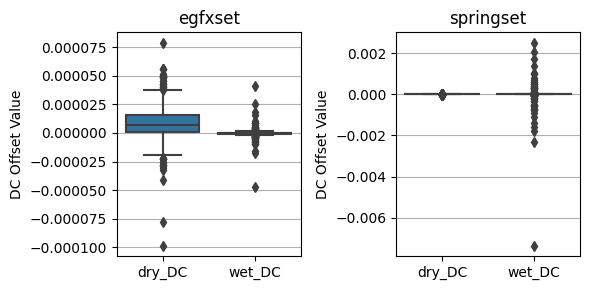

In [30]:
plt.figure(figsize=(6,3))

# egfxset boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=egfxset_df[['dry_DC', 'wet_DC']])
plt.title('egfxset')
plt.ylabel('DC Offset Value')
plt.grid(axis='y')

# springset boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=springset_df[['dry_DC', 'wet_DC']])
plt.title('springset')
plt.ylabel('DC Offset Value')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

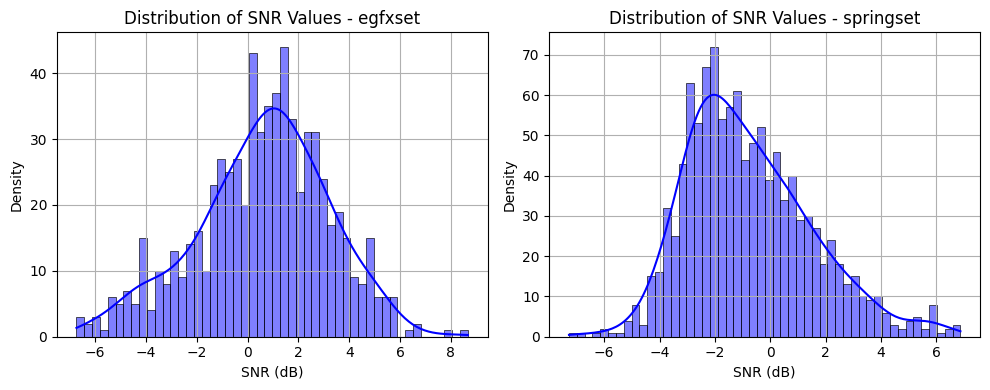

In [31]:
plt.figure(figsize=(10,4))

# egfxset SNR distribution
plt.subplot(1, 2, 1)
sns.histplot(egfxset_df['SNR'], bins=50, kde=True, color='blue')
plt.title('Distribution of SNR Values - egfxset')
plt.xlabel('SNR (dB)')
plt.ylabel('Density')
plt.grid(True)

# springset SNR distribution
plt.subplot(1, 2, 2)
sns.histplot(springset_df['SNR'], bins=50, kde=True, color='blue')
plt.title('Distribution of SNR Values - springset')
plt.xlabel('SNR (dB)')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()